# Creating and Backtesting SMA Strategies

---

# Getting the Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [13]:
# read the data
df = pd.read_csv("../Data/eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [14]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


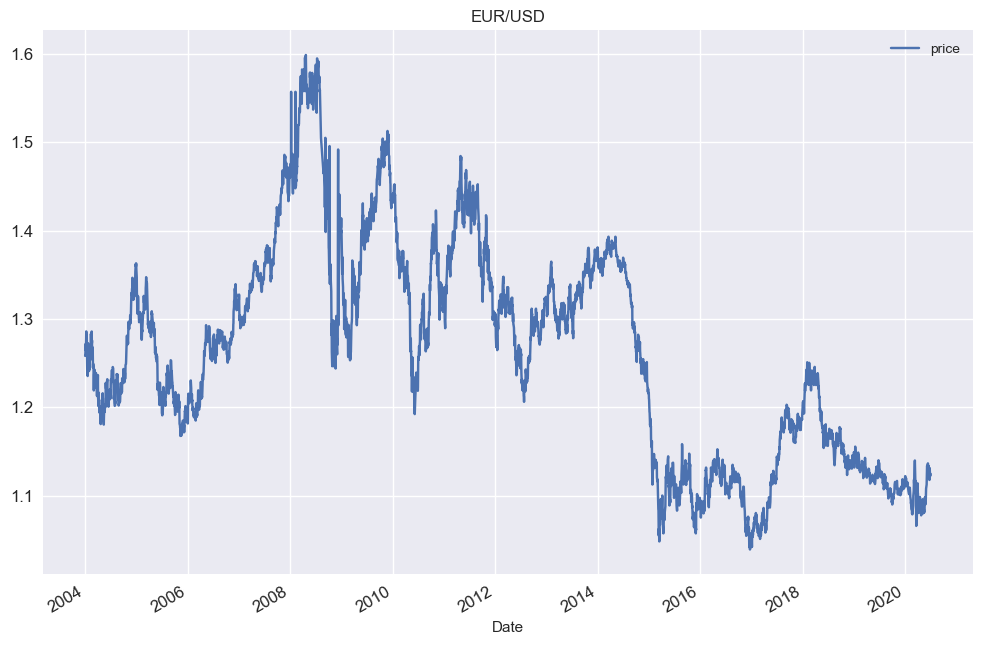

In [16]:
# Plot
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [17]:
# Compute the log return
df["returns"] = np.log(df.div(df.shift(1)))

In [18]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


---

# A simple Buy and Hold "Strategy"

In [19]:
df.dropna(inplace = True)

In [20]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


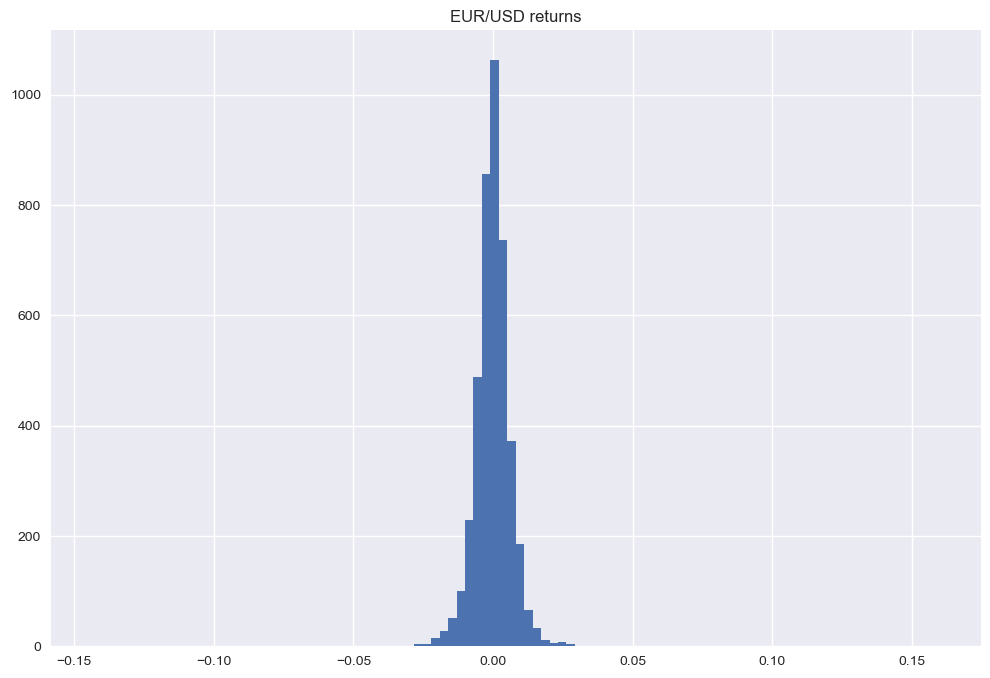

In [21]:
# Plot the distribution of the returns
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [22]:
# the sum of the returns.
# (incorrect. we need to apply the exponent for inverse the log.)
df.returns.sum()

-0.11214302770699758

In [23]:
# we apply the exp on the log return, than sum it. 
# this is the return of the "Buy and Hold strategy"  
np.exp(df.returns.sum())

0.8939163935445148

In [24]:
# We can reach it in this way:
# first price / last price 
df.price[-1] / df.price[0]

C:\Users\97250\AppData\Local\Temp\ipykernel_34996\240220255.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.price[-1] / df.price[0]


0.8939163935445141

In [25]:
# If we want to check the return over time, we can compute
# the cumelative return by the cumsum(). 
# we need to apply np.exp() for inverse the log (log return.)
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [26]:
# but let's store it
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [27]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


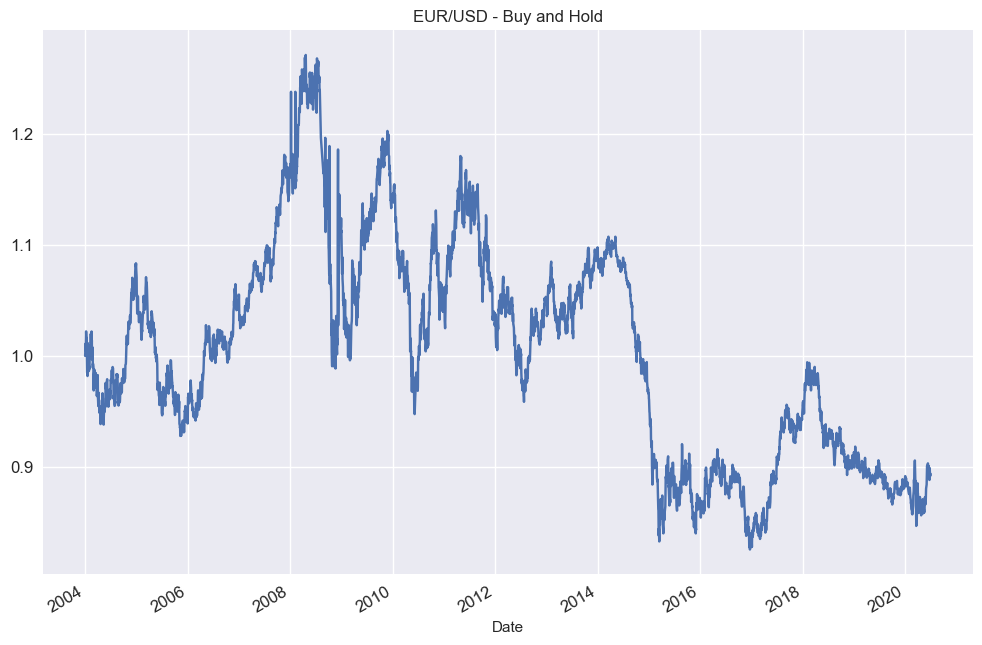

In [28]:
# Plot the cumelatuve return 
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

---

# More Performance Metrics

In [29]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [30]:
df.creturns.iloc[-1] # absolute Performance 

0.8939163935445149

In [31]:
df.returns.sum() # absolute Performance

-0.11214302770699758

In [32]:
# describe() -> aggrigation functions on our dataFrame
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


__annualized mean return and risk__

In [33]:
df.returns.mean() * 252 # mean return

-0.006612083056191715

In [34]:
df.returns.std() * np.sqrt(252) # risk

0.12054120479431393

__maximum drawdown__

In [35]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [36]:
# store the temporary max cumelative return value 
# (see the plot below and you'll understend.)
df["cummax"] = df.creturns.cummax()

In [37]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


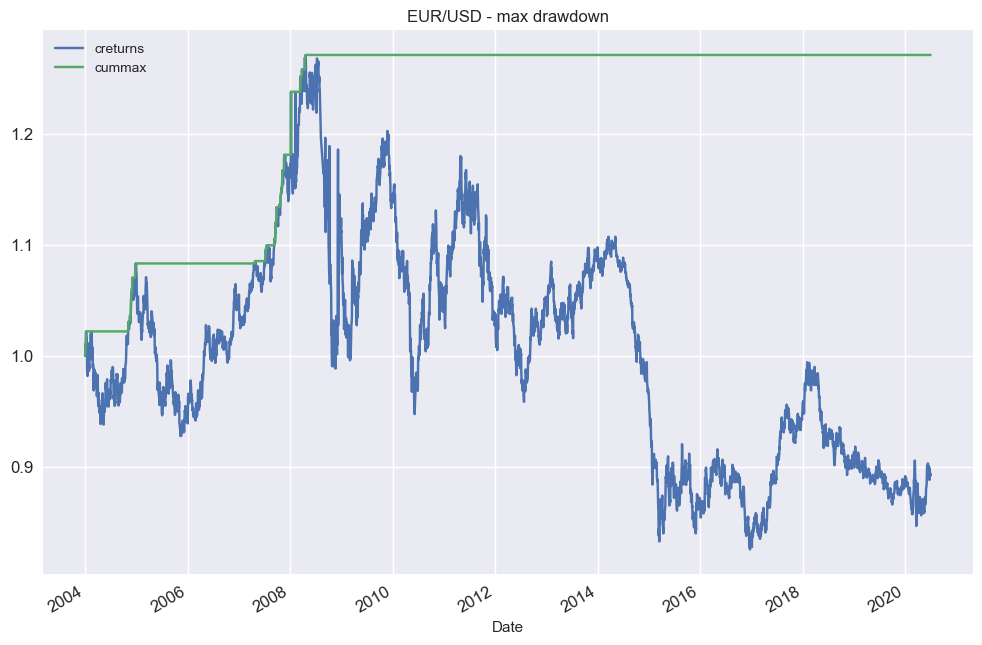

In [38]:
# Plot cumelatie return and cummax
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [39]:
# Compute the drawdown. 
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [40]:
drawdown.max() # maximum drawdown

0.4448840569933439

In [41]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

---

# Defining an SMA Crossover Strategy

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [43]:
data = pd.read_csv("../Data/eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [44]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [45]:
sma_s = 50 # sort SMA 
sma_l = 200 # long SMA

In [46]:
# sort SMA 
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [47]:
# long SMA
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [48]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


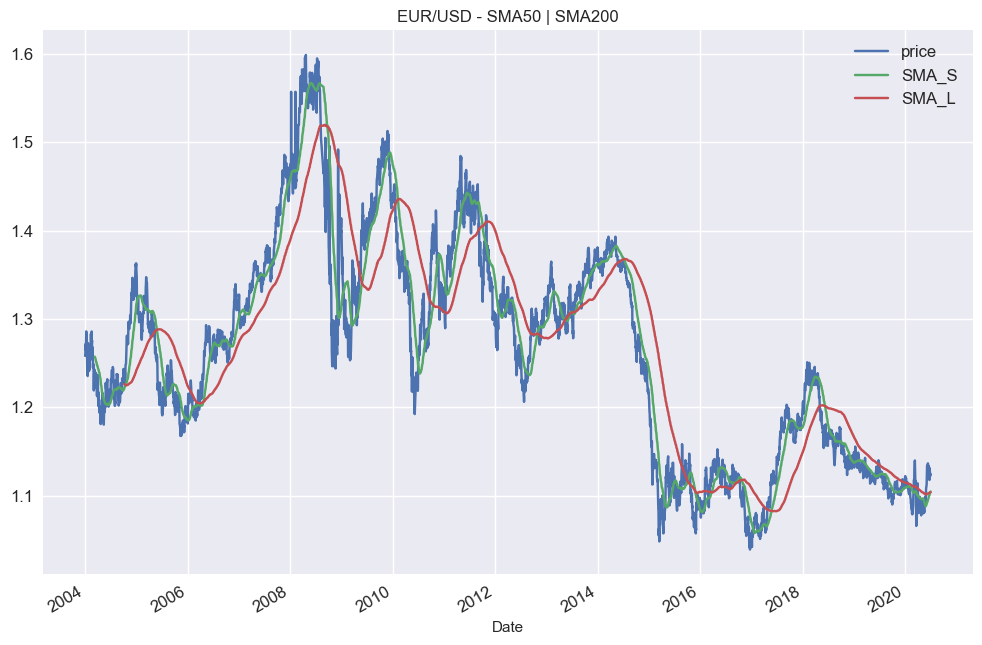

In [49]:
# Plot the price, sort SMA & long SMA
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [50]:
data.dropna(inplace = True)

In [51]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


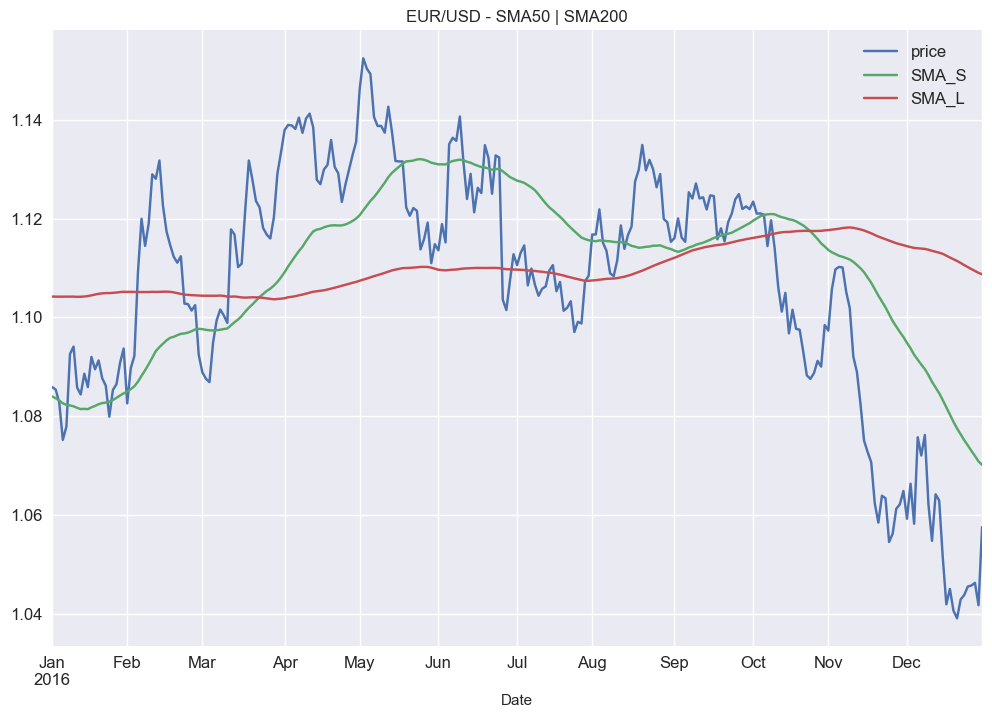

In [52]:
# ZOOM into 2016
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [53]:
# Compute the position of the cross SMA strategy.

# sort SMA > long SMA ? BUY (1). 
# long SMA > sort SMA ? SELL (-1)
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [54]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


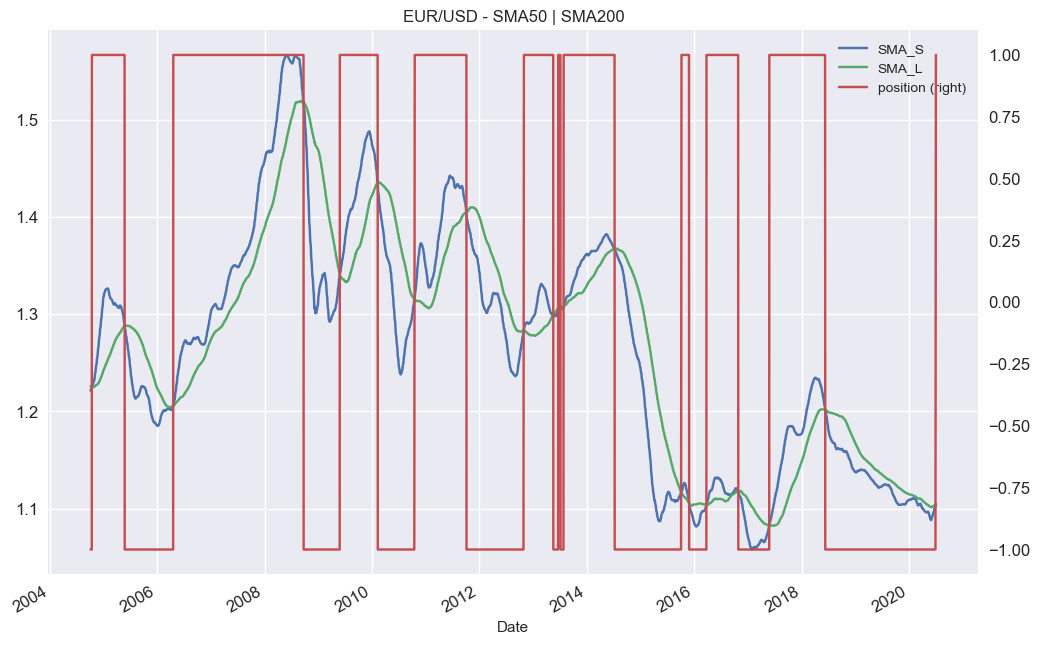

In [55]:
# See all the trades (we we taken a position BUY/SELL)
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

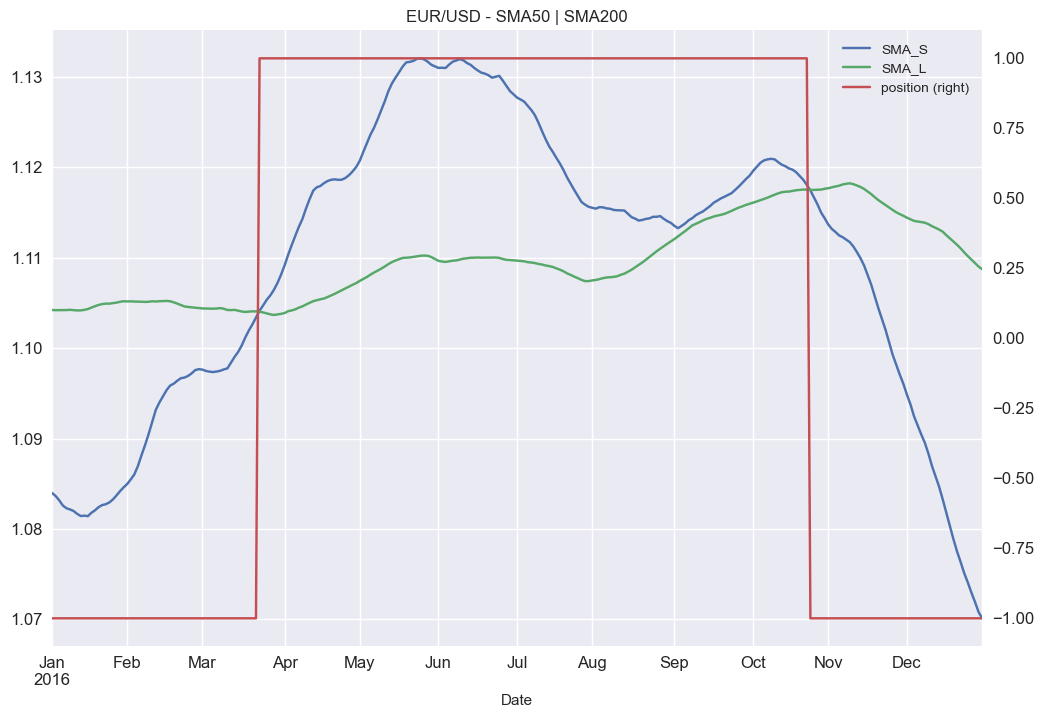

In [56]:
# ZOOM into 2016
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

---

# Vectorized Strategy Backtesting

> Compute the return of the strategy, number of trades, cumelative sum, and so on...

In [57]:
# So far the data that contain the SMAs indicators and the positions,
# based on the cross SMA strategy:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [58]:
# Compute simple return
data["returns"] = data.price.pct_change()

In [59]:
# compute the log return
# log(price[i] / price[i+1])
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [60]:
# Compute the return of the strategy.

# positions -> can be 1/-1 
# when we shift 1 step forward and multyply that by the return, its like:
# at the end of the day, we take a position, and sell it tommorow. 
data["strategy"] = data.position.shift(1) * data["returns"]

In [61]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [62]:
data.dropna(inplace = True)

In [63]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.087929
strategy    0.249591
dtype: float64

In [64]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.915826
strategy    1.283500
dtype: float64

In [65]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns    -0.005438
strategy    0.015435
dtype: float64

In [66]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.120806
strategy    0.120802
dtype: float64

In [67]:
# Cumelative return of buy and hold strategy
data["creturns"] = data["returns"].cumsum().apply(np.exp)

# Cumelative return of cross SMA strategy
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [68]:
# We can calculate it also in that way: 
data["creturns"] = (data["returns"] + 1).cumprod()
data["cstrategy"] = (data["strategy"] + 1).cumprod()

In [69]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957


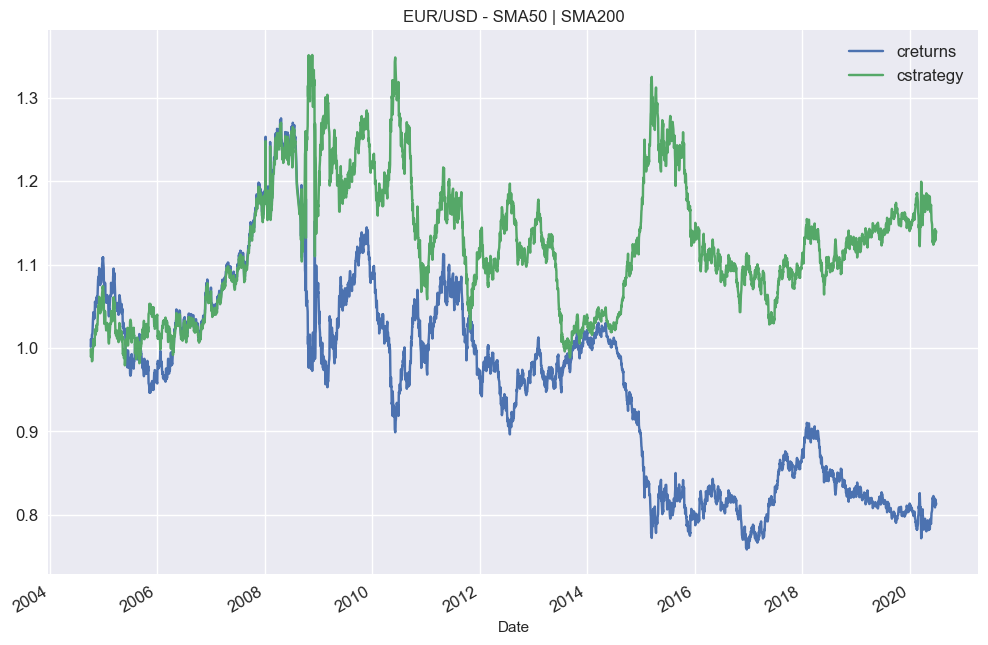

In [70]:
# Plot the cumelative return of the strategies
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

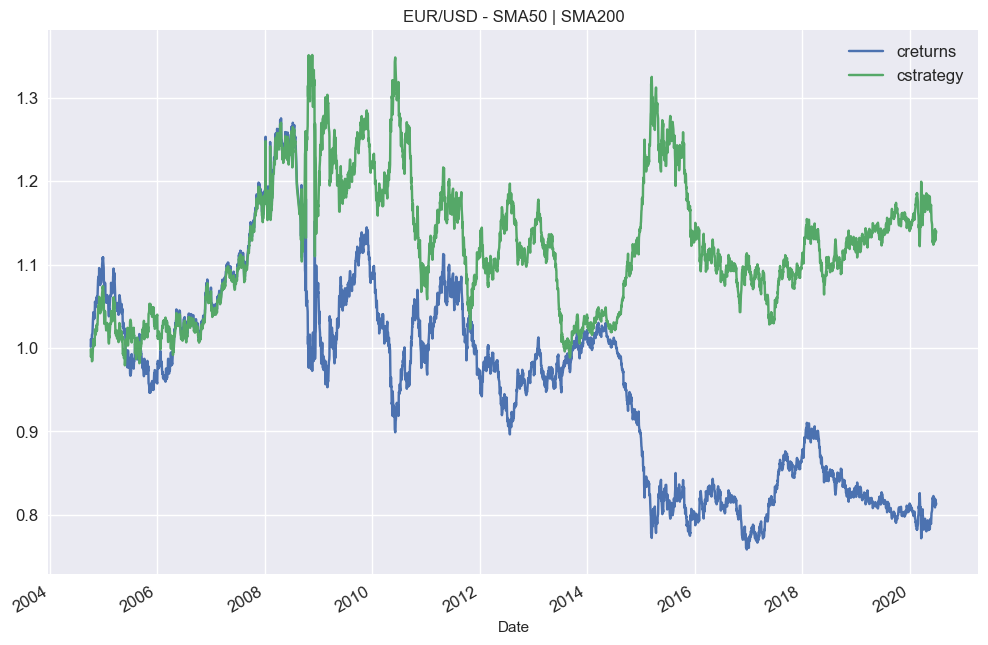

In [71]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [72]:
# outperformance of our strategy from the buy and hold strategy.
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.3258084825207118

---

# Finding the optimal SMA Strategy

In [73]:
df = pd.read_csv("../Data/eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [74]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [75]:
# Function for run the cross SMA strategy + make vectorization. 
def run_strategy(SMA): 
    
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [76]:
run_strategy((50, 200))

C:\Users\97250\AppData\Local\Temp\ipykernel_34996\2696340501.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data[["returns", "strategy"]].sum().apply(np.exp)[-1]


1.2835003323288487

In [77]:
run_strategy((10, 50))

C:\Users\97250\AppData\Local\Temp\ipykernel_34996\2696340501.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data[["returns", "strategy"]].sum().apply(np.exp)[-1]


0.9869996463269878

In [78]:
run_strategy((22, 252))

C:\Users\97250\AppData\Local\Temp\ipykernel_34996\2696340501.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data[["returns", "strategy"]].sum().apply(np.exp)[-1]


1.149280327487213

In [79]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [80]:
from scipy.optimize import brute

In [ ]:
# Call the optimizer - find the best SMA's parameters 
# from the given range space 

# (10, 50, 1) -> Range of sort SMA, from 10 to 50
# (100, 252, 1) -> Range of long SMA, from 100 to 252
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

In [82]:
# The results with the best SMAs parameters: 
-run_strategy((46, 137))

C:\Users\97250\AppData\Local\Temp\ipykernel_34996\3343374617.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance


2.5266939897810787

---

# Trades and Transaction Costs (Part 1)

Let's include the costs.

In [83]:
data # sma 50/200 strategy

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957


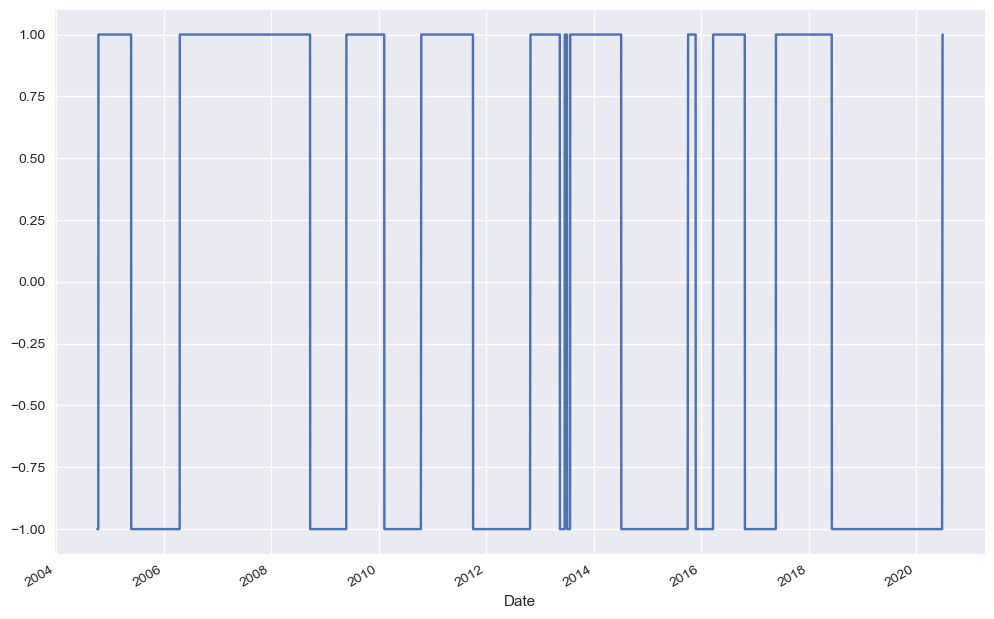

In [84]:
# Plot the positions that we've take 
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [85]:
data.position.diff().fillna(0).abs()

Date
2004-10-07    0.0
2004-10-08    0.0
2004-10-11    0.0
2004-10-12    0.0
2004-10-13    0.0
             ... 
2020-06-24    0.0
2020-06-25    0.0
2020-06-26    0.0
2020-06-29    2.0
2020-06-30    0.0
Name: position, Length: 4075, dtype: float64

In [86]:
# Count the number of trades that we take 
# trade = change position 
# from Long->Short/Short->Long/Hold->Long/Hold->Sort/...
data["trades"] = data.position.diff().fillna(0).abs()

In [87]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades
Date,,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525,0.0
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557,0.0
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630,0.0
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689,0.0
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898,0.0
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049,0.0
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957,0.0


In [88]:
data.trades.value_counts()

# Interpretation
# 2.0      21 
# we take 2.0 * 21 = 42 trades in total.

trades
0.0    4054
2.0      21
Name: count, dtype: int64

---

# Trades and Trading Costs (Part 2)

(simplified approximation for vectorized backtesting)

In [89]:
# 1.5 pips 
spread = 1.5 * 0.0001 # pips == Fourth price decimal
commissions = 0

In [90]:
spread

0.00015000000000000001

In [91]:
# absolute tc per trade (position change +-1)
half_spread = spread / 2

# ------ Example --------
# If we BUT/SELL 100,000 USD/euro, this is the trading costs:
# half_spread -> the costs for each USD/euro!  
print(f"{round(half_spread * 100000,3)}$")
# So for trade 100,000 USD/euro, we need to pay trading costs of 7.5$ 
# -----------------------

7.5$


In [92]:
half_spread # very small number.. 

7.500000000000001e-05

In [93]:
# proportional tc per trade (position change +-1)
ptc = half_spread / data.price.mean() 
ptc

5.93304228050709e-05

In [94]:
half_spread > ptc 

True

In [95]:
ptc = 0.00007

In [96]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades
Date,,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525,0.0
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557,0.0
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630,0.0
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689,0.0
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898,0.0
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049,0.0
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957,0.0


In [97]:
# Now, let's compute the return of the strategy include the trading cost!
# for calculate trading costs for the strategy, we need to:
# strategy return - number of trades * trading costs per trade. 
data["strategy_net"] = data.strategy - data.trades * ptc

In [98]:
# Now, let's compute the cumelative return after trading costs
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [99]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525,0.0,-0.001475,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557,0.0,-0.008982,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630,0.0,0.002095,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689,0.0,0.005102,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427,0.0,-0.002270,0.994486
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898,0.0,-0.002892,1.267717
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049,0.0,0.005449,1.274644
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957,0.0,0.002562,1.277914


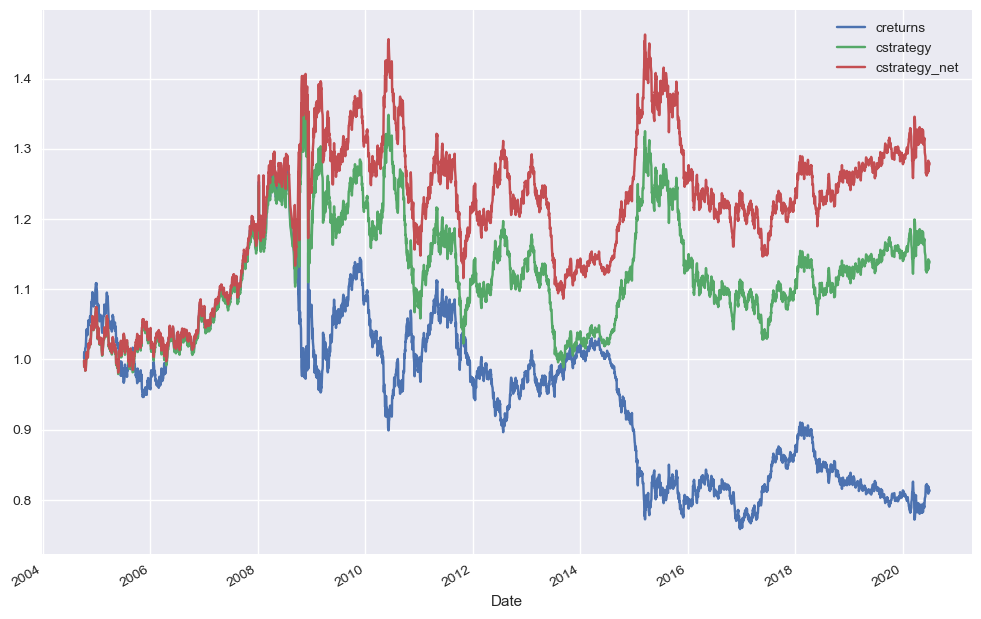

In [100]:
# Plot the:
# cross SMA before trading costs
# cross SMA after trading costs
# simple but and hold strategy
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

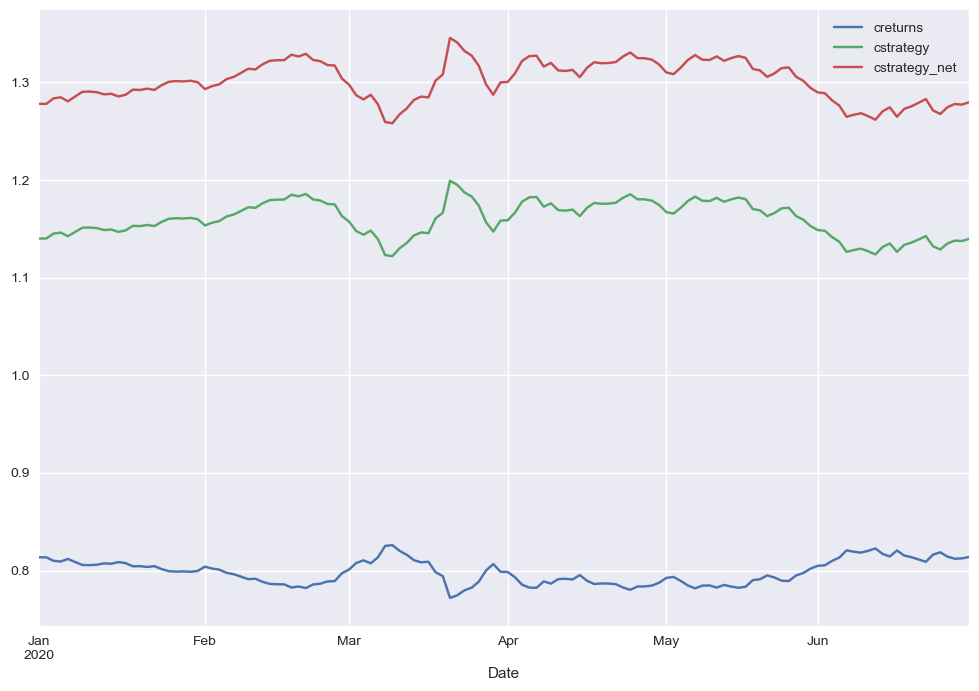

In [101]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()